# DOT
## language to define the graph

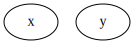

In [24]:
import graphviz

dot_s = """
digraph g{
    x
    y
}
"""

g = graphviz.Source(dot_s)
g

## color

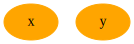

In [25]:
dot_s = """
digraph g{
1 [label=x, color=orange, style=filled]
2 [label=y, color=orange, style=filled]
}
"""

g = graphviz.Source(dot_s)
g

## shape

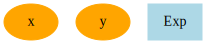

In [26]:
dot_s = """
digraph g{
1 [label=x, color=orange, style=filled]
2 [label=y, color=orange, style=filled]
3 [label=Exp, color=lightblue, style=filled, shape=box]
}
"""

g = graphviz.Source(dot_s)
g

## connecting node

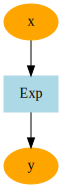

In [27]:
dot_s = """
digraph g{
1 [label=x, color=orange, style=filled]
2 [label=y, color=orange, style=filled]
3 [label=Exp, color=lightblue, style=filled, shape=box]
1 -> 3
3 -> 2
}
"""

g = graphviz.Source(dot_s)
g

# Transform Dezero graph to DOT language

### 1. dot variable

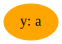

In [74]:
dot_s = """
digraph g{
2 [label=x, color=orange, style=filled]
2 [label="y: a", color=orange, style=filled]
}
"""

g = graphviz.Source(dot_s)
g

In [77]:
# we added _ at dot_var because this function will be used only at local
# only at get_dot_graph function
def _dot_var(v, verbose=False):
    dot_var = '{} [label="{}", color=orange, style=filled]\n'
    
    name = '' if v.name is None else v.name
    if verbose and v.data is not None:
        if v.name is not None:
            name += ': '
        name += str(v.shape) + ' ' + str(v.dtype)
    return dot_var.format(id(v), name)

In [78]:
import numpy as np
from dezero import Variable

x = Variable(np.random.randn(2, 3))
x.name = 'x'
print(_dot_var(x))
print(_dot_var(x, verbose=True))

2291180430536 [label="x", color=orange, style=filled]

2291180430536 [label="x: (2, 3) float64", color=orange, style=filled]



### 2. dot function

In [33]:
x.__class__

dezero.core_simple.Variable

In [32]:
x.__class__.__name__

'Variable'

In [38]:
def _dot_func(f):
    dot_func = '{} [label={}, color=lightblue, style=filled, shape=box]\n'
    txt = dot_func.format(id(f), f.__class__.__name__)
    
    dot_edge = '{} -> {}\n'
    for x in f.inputs:
        txt += dot_edge.format(id(x), id(f))
    for y in f.outputs:
        # y is weakref so we should use y()
        txt += dot_edge.format(id(f), id(y()))
    return txt

In [39]:
import numpy as np
from dezero import Variable

x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1

print(_dot_func(y.creator))

2291162710600 [label=Add, color=lightblue, style=filled, shape=box]
2291162710472 -> 2291162710600
2291162710408 -> 2291162710600
2291162710600 -> 2291162710792



### 3. dot graph

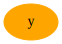

In [48]:
dot_s = """
digraph g{
2 [label=x, color=orange, style=filled]
2 [label=y, color=orange, style=filled]
}
"""

g = graphviz.Source(dot_s)
g

In [89]:
def get_dot_graph(output, verbose=True):
    txt = ''
    funcs = []
    seen_var = set()
    seen_func = set()
    
    def add_func(f):
        if f not in seen_func:
            funcs.append(f)
            seen_func.add(f)
    
    add_func(output.creator)
    txt += _dot_var(output, verbose)
    
    while funcs:
        func = funcs.pop()
        txt += _dot_func(func)
        for x in func.inputs:
            if x not in seen_var:
                txt += _dot_var(x, verbose)
                seen_var.add(x)
                
                if x.creator is not None:
                    add_func(x.creator)
        
    return 'digraph g{\n' + txt + '}'

### 4. graph to image

In [42]:
import os

os.path.expanduser('~')

'C:\\Users\\hyunb'

In [45]:
os.path.splitext('graph.png')

('graph', '.png')

In [47]:
import os
import subprocess

def plot_dot_graph(output, verbose=True, to_file='graph.png'):
    dot_graph = get_dot_graph(output, verbose)
    
    # save dot to file
    tmp_dir = os.path.join(os.path.expanduser('~'), '.dezero')
    if not os.path.exists(tmp_dir):
        os.mkdir(tmp_dir)
    graph_path = os.path.join(tmp_dir, 'tmp_graph.dot')
    
    with open(graph_path, 'w') as f:
        f.write(dot_graph)
        
    # run dot command
    extension = os.path.splitext(to_file)[1][1:]
    cmd = 'dot {} -T {} -o {}'.format(graph_path, extension, to_file)
    subprocess.run(cmd, shell=True)
    
    # visualize when using jupyter notebook
    try:
        from IPython import display
        return display.Image(filename=to_file)
    except:
        pass

### 5. graph at jupyter notebook

Used when we don't wanna save any files at hardware

In [66]:
import os
import subprocess
import graphviz

def visualize_graph(output, verbose=True):
    dot_graph = get_dot_graph(output, verbose)
    return graphviz.Source(dot_graph)

# TEST

digraph g{
2291180408968 [label=y, color=orange, style=filled]
2291180325832 [label=Add, color=lightblue, style=filled, shape=box]
2291180408904 -> 2291180325832
2291180400520 -> 2291180325832
2291180325832 -> 2291180408968
2291180408904 [label=x0, color=orange, style=filled]
2291180400520 [label=x1, color=orange, style=filled]
}


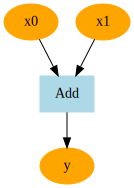

In [67]:
x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1

x0.name = 'x0'
x1.name = 'x1'
y.name = 'y'

txt = get_dot_graph(y, verbose=False)
print(txt)

visualize_graph(y, verbose=False)

digraph g{
2291180449032 [label="y", color=orange, style=filled]
2291179992776 [label=Add, color=lightblue, style=filled, shape=box]
2291180448968 -> 2291179992776
2291180448840 -> 2291179992776
2291179992776 -> 2291180449032
2291180448968 [label="x0", color=orange, style=filled]
2291180448840 [label="x1", color=orange, style=filled]
}


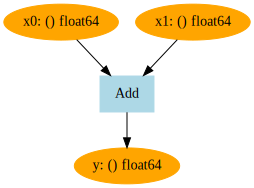

In [79]:
x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1

x0.name = 'x0'
x1.name = 'x1'
y.name = 'y'

txt = get_dot_graph(y, verbose=False)
print(txt)

visualize_graph(y, verbose=True)

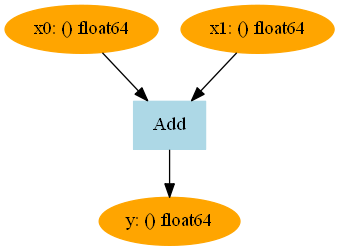

In [82]:
x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1

x0.name = 'x0'
x1.name = 'x1'
y.name = 'y'

plot_dot_graph(y)

# Merge code to library and TEST!

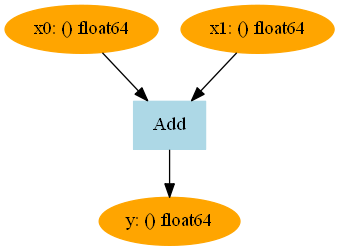

In [83]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph

x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1

x0.name = 'x0'
x1.name = 'x1'
y.name = 'y'

plot_dot_graph(y)   

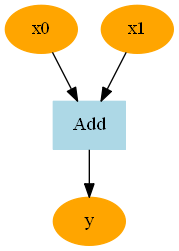

In [84]:
plot_dot_graph(y, verbose=False) 

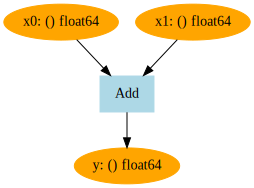

In [85]:
from dezero.utils import visualize_graph

visualize_graph(y)

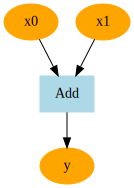

In [86]:
visualize_graph(y, verbose=False)

# Goldstein-Price test

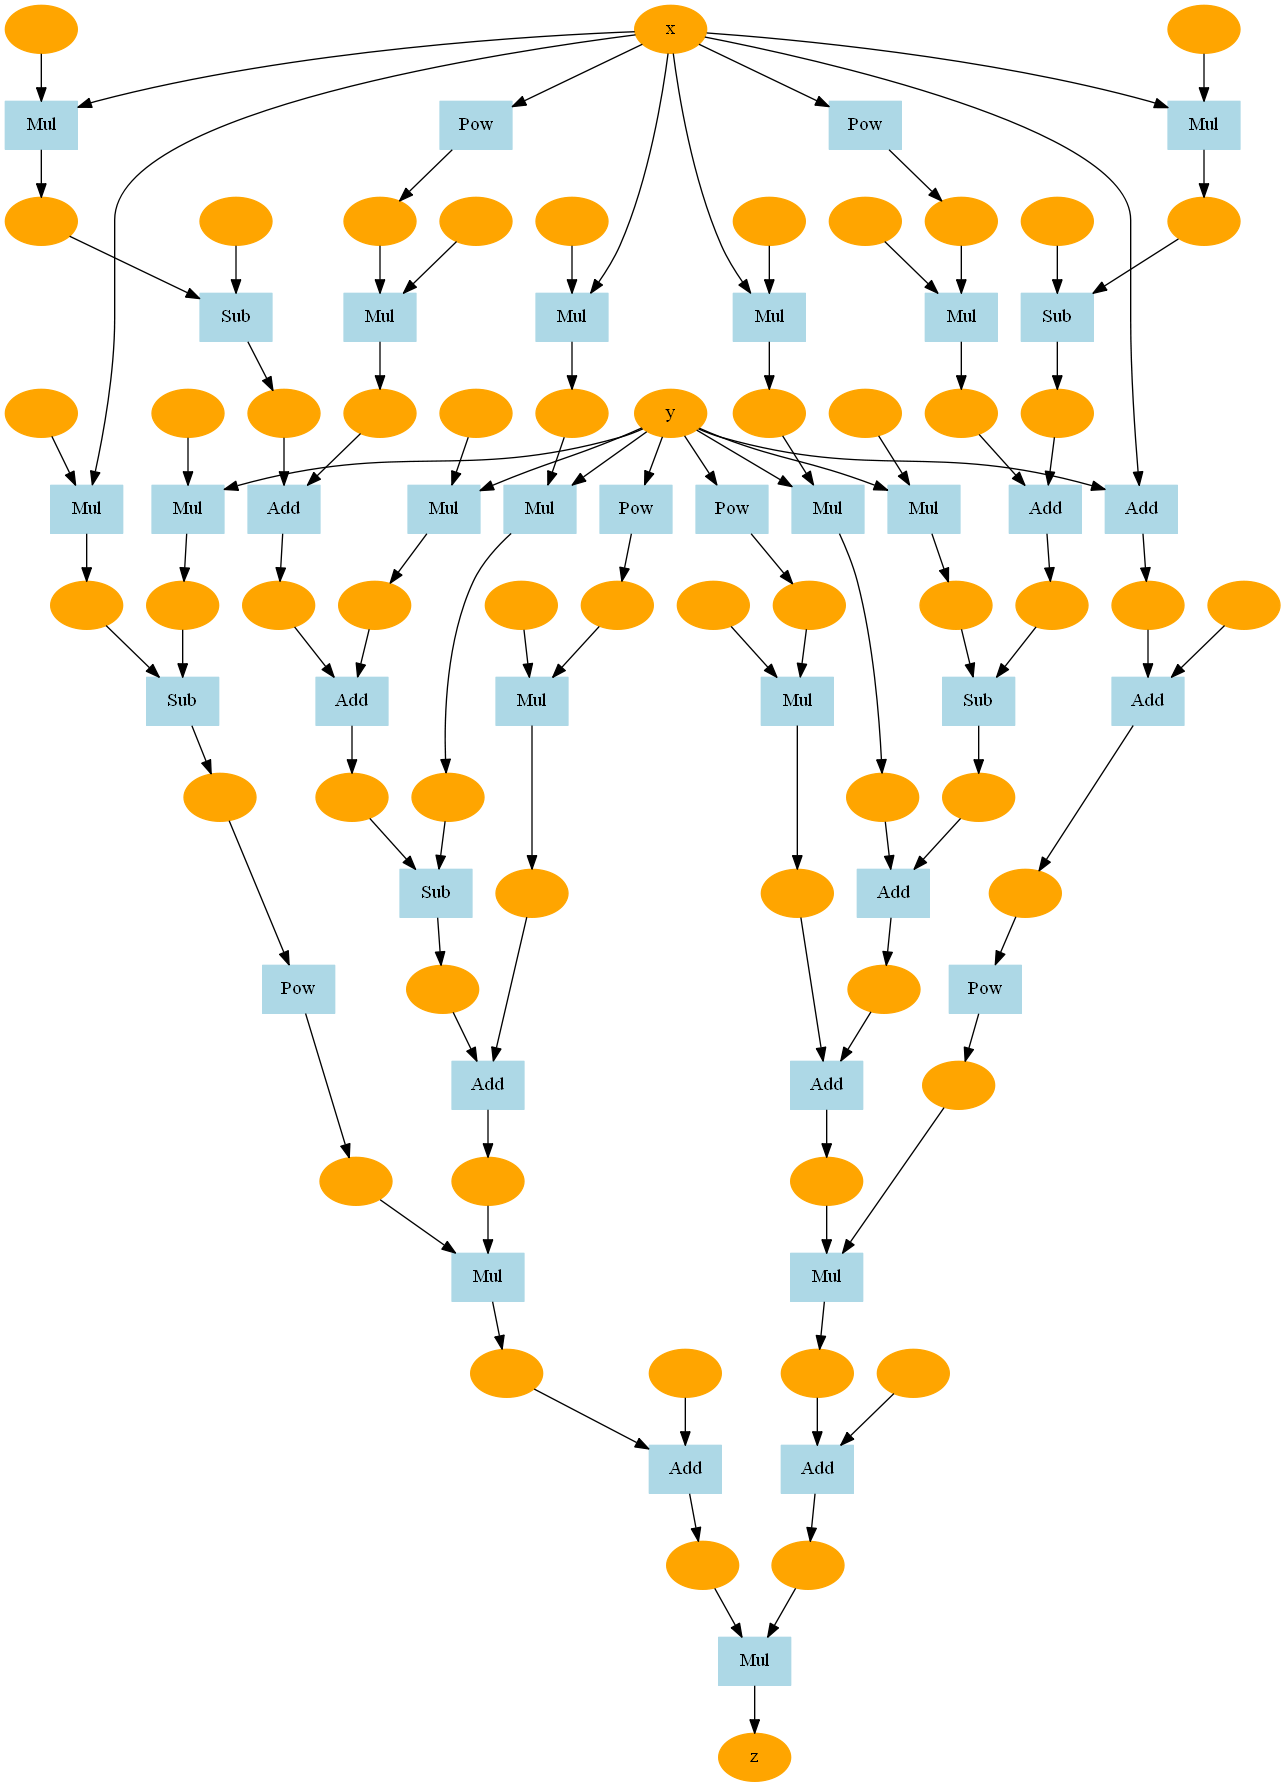

In [1]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph
from dezero.utils import visualize_graph

def goldstein(x, y):
    z = (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * \
        (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x, y)

z.backward()

x.name = 'x'
y.name = 'y'
z.name = 'z'

plot_dot_graph(z, verbose=False, to_file='goldstein.png')

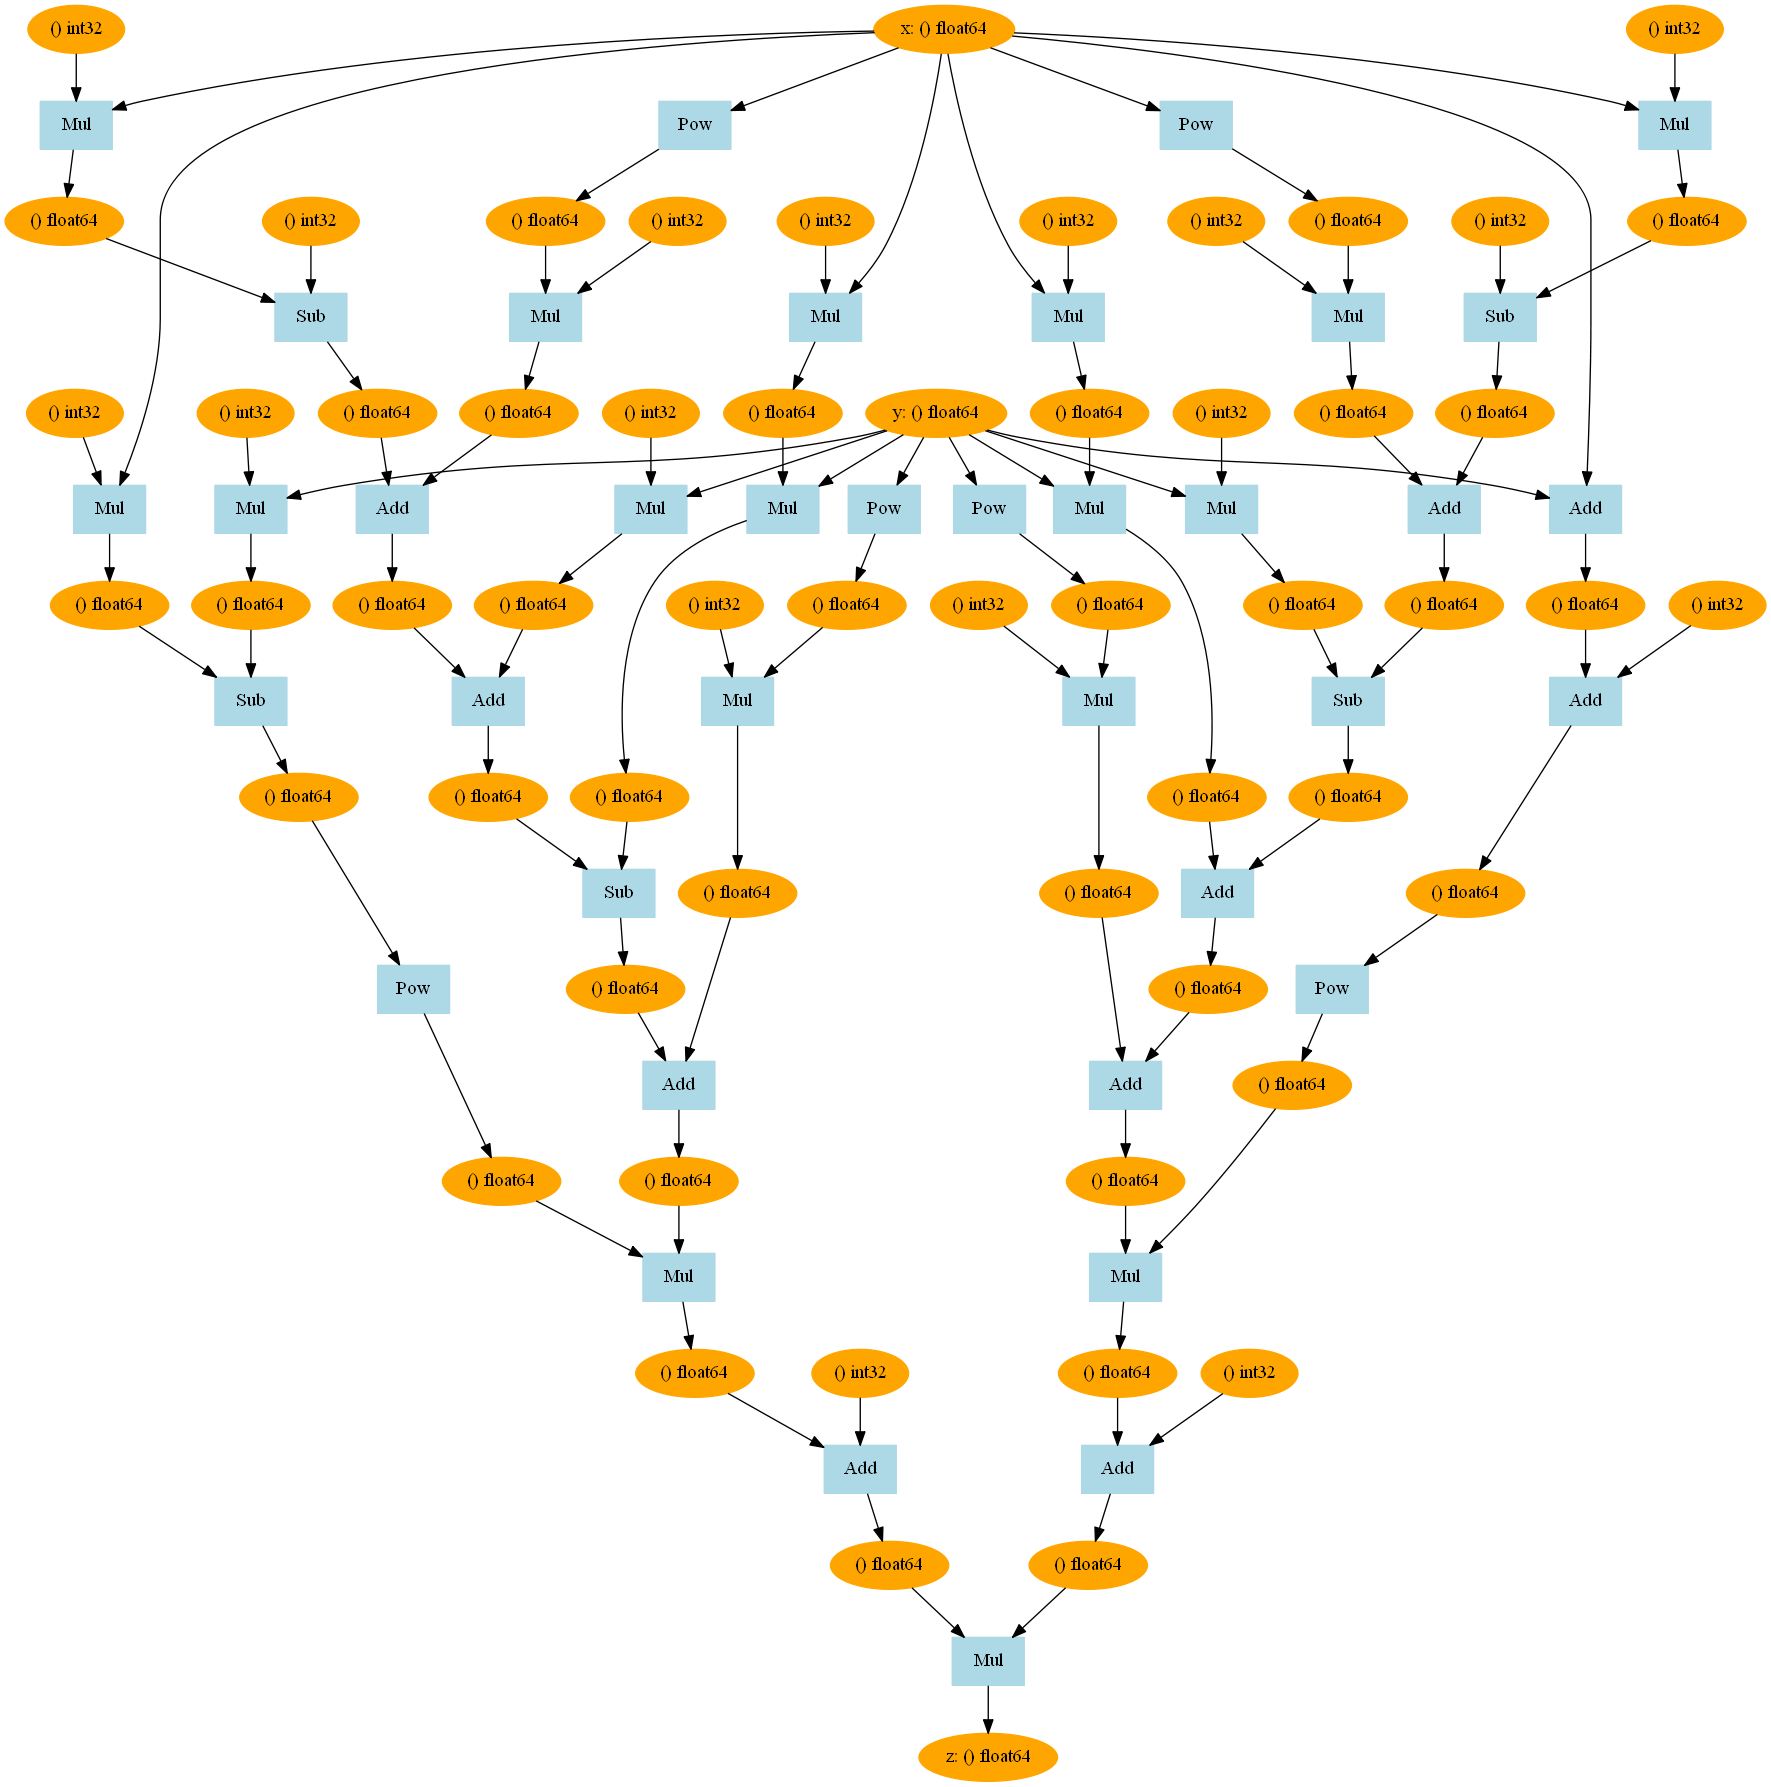

In [2]:
plot_dot_graph(z, verbose=True, to_file='goldstein.png')

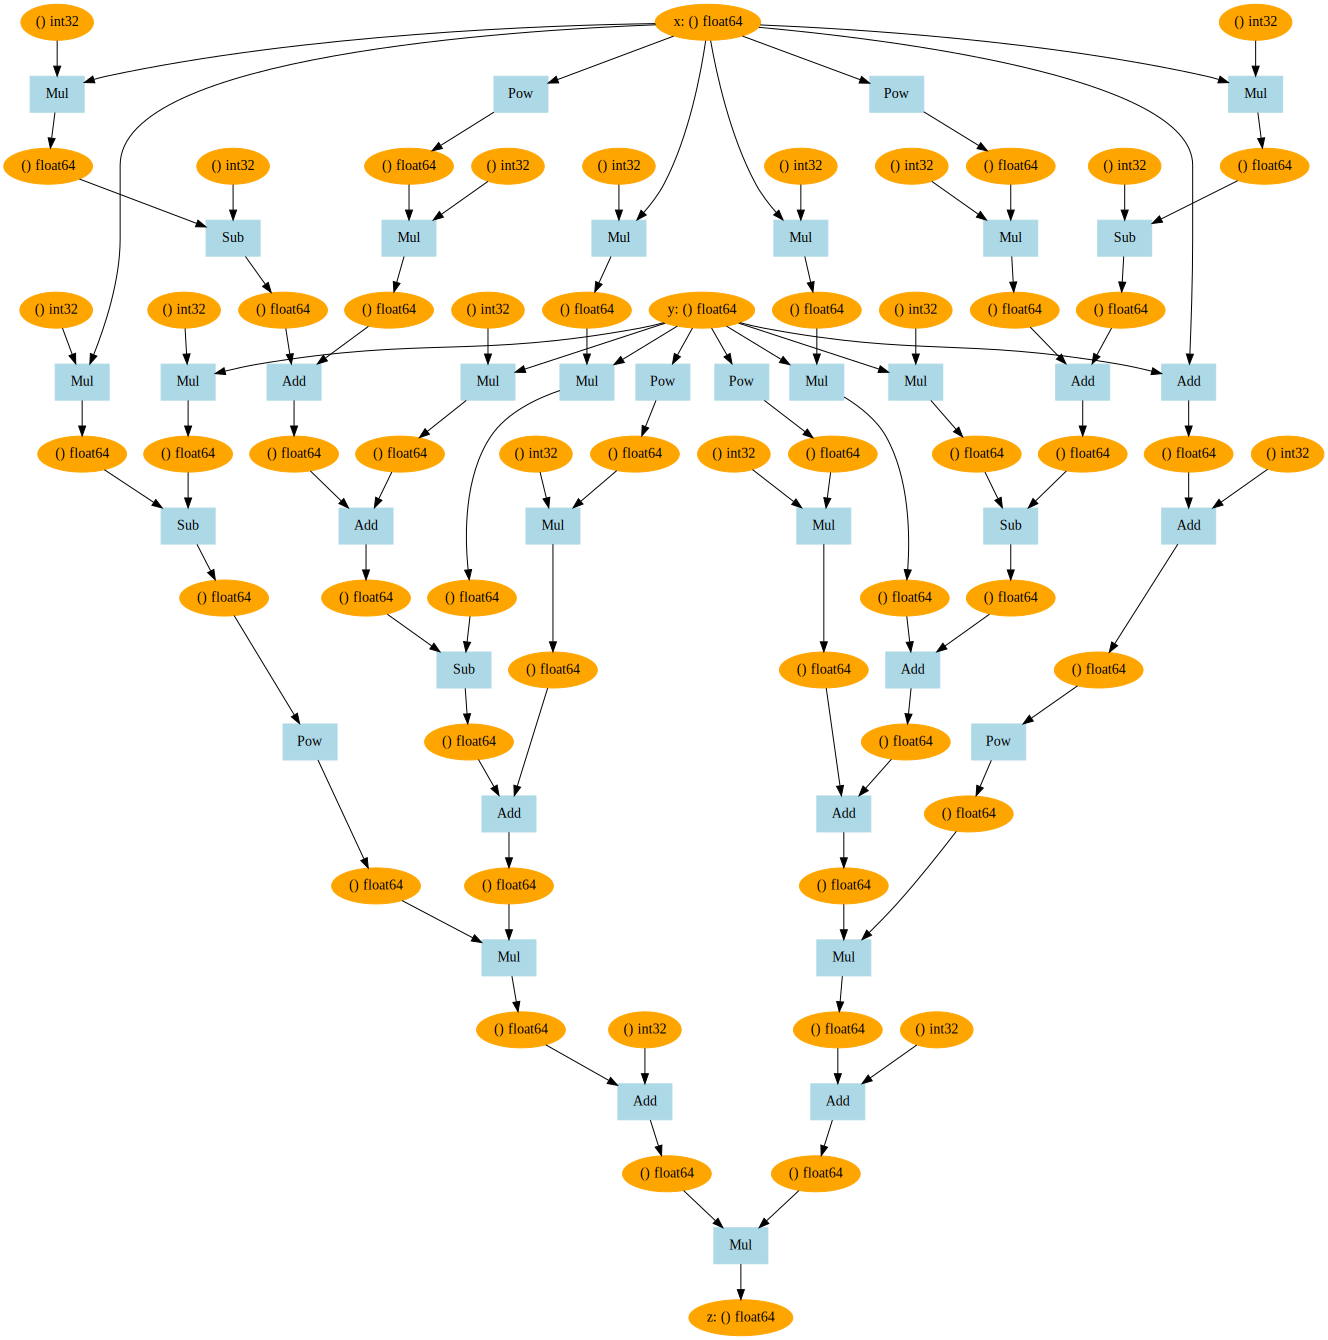

In [3]:
visualize_graph(z)

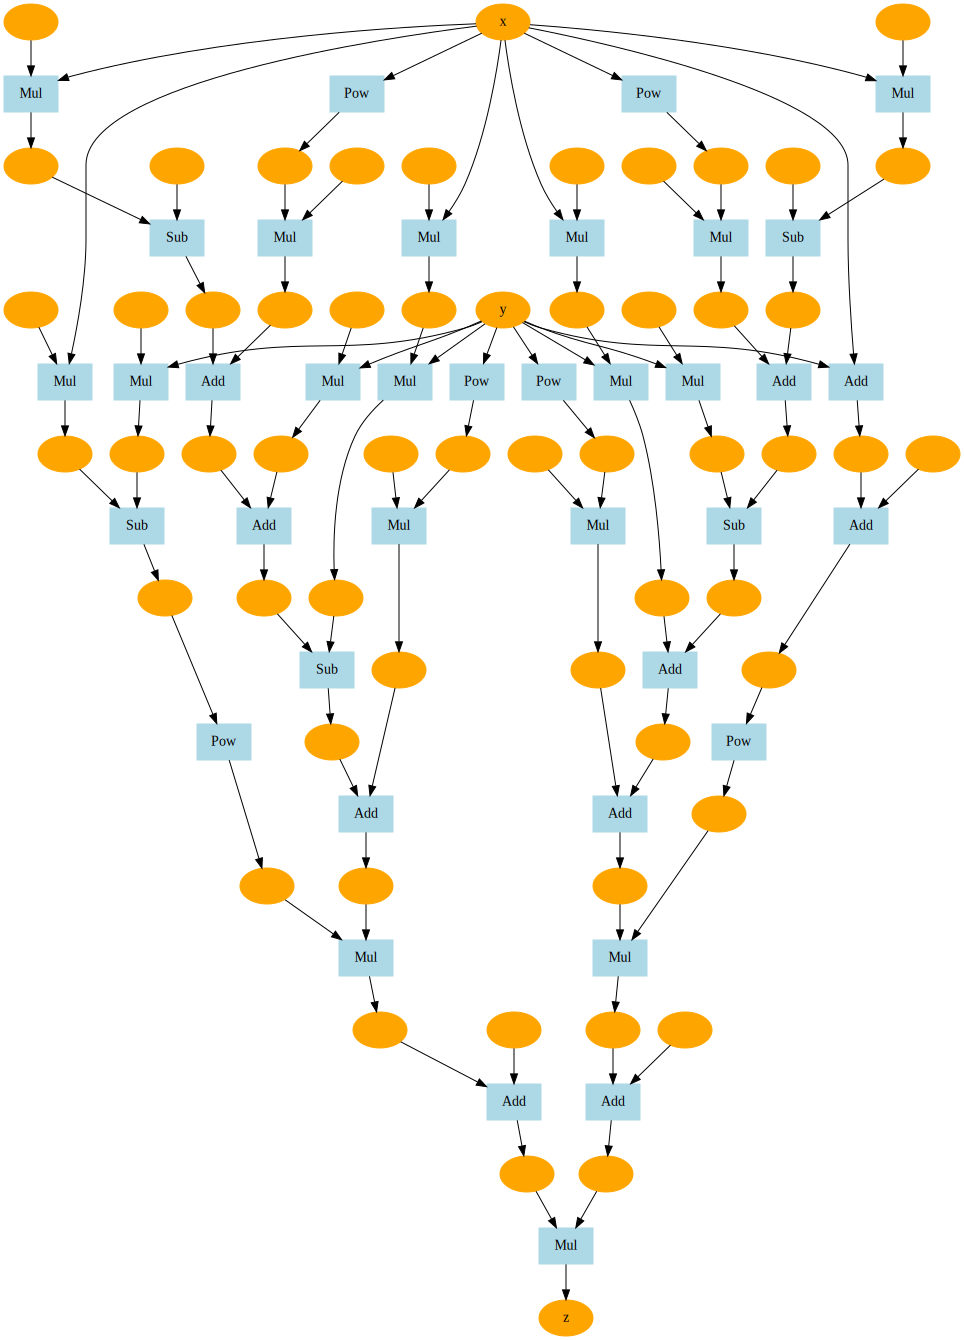

In [4]:
visualize_graph(z, verbose=False)